# Sales Prediction


In [1]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the data
data=pd.read_csv(r"C:\Users\WAGHMARE\Downloads\archive (6)\Advertising.csv",index_col=0,header=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
#Checking the data types
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
data.shape

(200, 4)

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

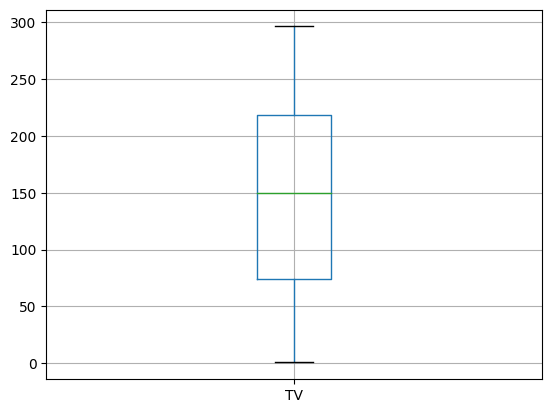

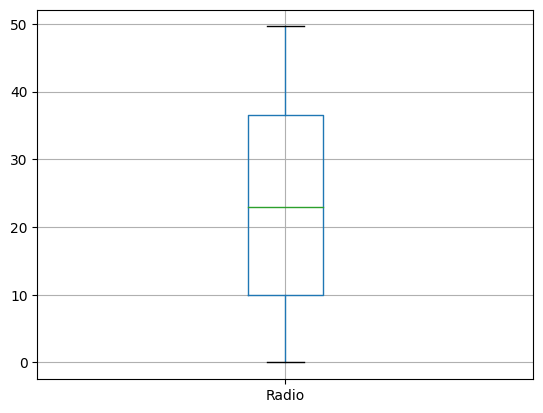

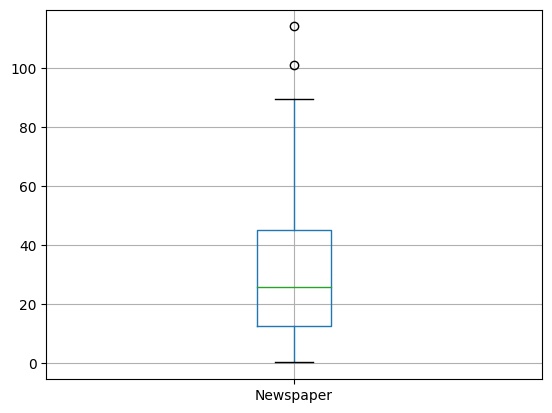

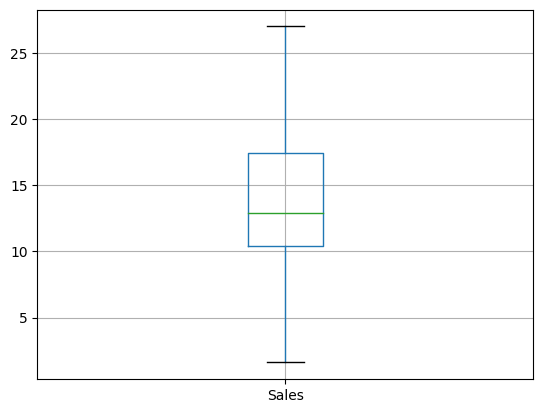

In [8]:
# assumptions 1
#1 there should be no outliers in the data
# cheak using boxplot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

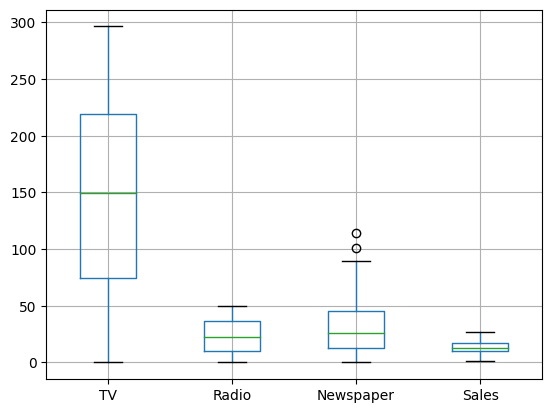

In [9]:
data.boxplot()
plt.show()

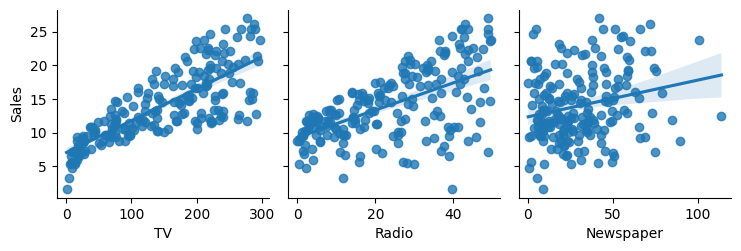

In [42]:
# assumption 2 
# every independent variable  should have a linear realtionship with dependent variable 
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',kind='reg')
# tv and radio shows relationship 
# newspaper shows no relationship
plt.show()

In [21]:
# data.drop(['newspaper'],axis=1,inplace=True)
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
# x=data[['TV','radio','newspaper']]
# y=data['sales']

In [22]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [23]:
import warnings 
warnings.filterwarnings('ignore')

In [24]:
# assumption 3
# check normality
sns.distplot(y) 

<Axes: xlabel='Sales', ylabel='Density'>

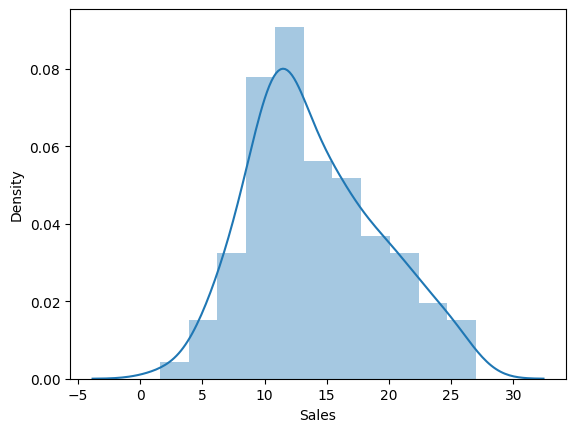

In [25]:
plt.show()

In [26]:
# if the y value is highly  skewed  we use log transformation to reduce the skewness
# log transformation
# import numpy as np
# y_log=np.log(y)

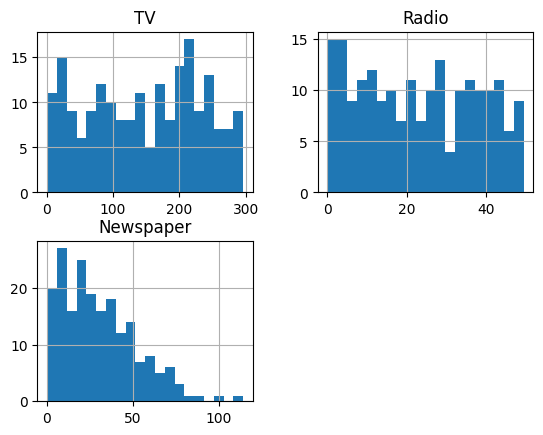

In [27]:
x.hist(bins=20)
plt.show()

In [28]:
from scipy.stats import skew
# finding the skeweness in each variable 
data_num_skew=x.apply(lambda i:skew(i.dropna()))
# subsetting the varibles that highly skewed 
data_num_skewed =data_num_skew[(data_num_skew>0.75)|(data_num_skew<-0.75)]
print(data_num_skew)
print(data_num_skewed)

TV          -0.069328
Radio        0.093467
Newspaper    0.887996
dtype: float64
Newspaper    0.887996
dtype: float64


In [29]:
# import numpy as np 
# apply log+1 transformations for all numeric features with skewness over 0.75

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


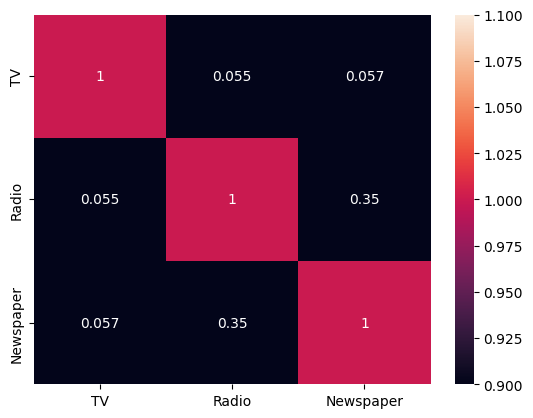

In [30]:
# assumption of no multicollinearity between the independent variable
# multicollinearity is the relationship amongst the independent variables

corr_df=x.corr(method='pearson')
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=1.0,annot=True)
plt.show()

In [31]:
# if there is high correlation pair found we can eliminate one variable 
# out of it (after logically think ) this helps in features selection 

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df= pd.DataFrame()
vif_df['features']=x.columns
vif_df['VIF Factor']=[vif(x.values,i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,2.49
1,Radio,3.29
2,Newspaper,3.06


In [33]:
#X.drop("newspaper",axis=1,inplace=True)
#return the VIF code

In [34]:
from sklearn.model_selection import train_test_split

#split the data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [36]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(x_train,y_train)
#print the intercept and coefficient
print(lm.intercept_)
print(lm.coef_)


3.2540971144188813
[ 0.0437726   0.19343299 -0.00222879]


In [37]:
print(list(zip(x.columns,lm.coef_)))

[('TV', 0.04377260306304603), ('Radio', 0.19343298611600773), ('Newspaper', -0.0022287928056053644)]


In [38]:
x1=100
x2=100
x3=np.log1p(100)
y_pred=3.254097114418883 + (0.04377260306304603*x1 + 0.19343298611600765*x2) + (-0.0022287928056053743*x3)
print(y_pred) 

26.964369884919314


In [39]:
#predict using the model
y_pred1=lm.predict(x_test)
print(y_pred1)

[18.1625299  12.92663232 18.0531098  23.64464668 20.70438374 14.28227997
 14.94493548 21.38232981 21.17508238 12.73110461 24.00312134  7.21544071
 12.24762152 19.24345998 19.38241854 13.45643798 19.6247089   9.2531648
 21.13268075 20.90762408 15.53485445 10.92529369 22.82955184 15.8122438
 17.42515749  8.16218669 11.89783444 12.70337575 21.74138085  7.96215368
 12.50099965 20.45535282  4.72120047  4.72259288 16.75292333 15.75804986
  6.74415499 17.73477354  9.01591827 13.617599  ]


In [40]:
lm.score(x_train,y_train)
#y_pred1=lm.predict(x_train)
#score = r2_score(y_train,y_pred)

0.9209087553499528

In [41]:
new_df=pd.DataFrame()
new_df=x_test.copy()
new_df['Actual sales']=y_test
new_df['Predicted sales']=y_pred
new_df

,TV,Radio,Newspaper,Actual sales,Predicted sales
60,210.7,29.5,9.3,18.4,26.96437
6,8.7,48.9,75.0,7.2,26.96437
21,218.4,27.7,53.4,18.0,26.96437
199,283.6,42.0,66.2,25.5,26.96437
53,216.4,41.7,39.6,22.6,26.96437
20,147.3,23.9,19.1,14.6,26.96437
163,188.4,18.1,25.6,14.9,26.96437
56,198.9,49.4,60.0,23.7,26.96437
70,216.8,43.9,27.2,22.3,26.96437
3,17.2,45.9,69.3,9.3,26.96437
